In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [271]:
df=pd.read_csv('/content/drive/MyDrive/IML/Bonus Project/Flight_Dataset.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [272]:
df.isnull().values.any()
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [356]:
import warnings
warnings.filterwarnings('ignore')

In [274]:
df.iloc[9039,:]

Airline               Air India
Date_of_Journey       6/05/2019
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                 NaN
Additional_Info         No info
Price                      7480
Name: 9039, dtype: object

In [275]:
df=df.dropna(axis=0)
df = df.reset_index(drop=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 1)Exploratory Data Analysis

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [310]:
df.corr()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date_Day,Date_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013397,0.018446,0.025214,-0.159651,-0.060748,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.403412,0.161886,-0.022109,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.461176,-0.257352,0.026821,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Route,0.025214,0.403412,-0.461176,1.000000,0.288773,0.035152,0.164149,0.081632,0.244186,-0.075002,-0.068071,0.013898,-0.173352
Duration,-0.159651,0.161886,-0.257352,0.288773,1.000000,-0.167870,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,-0.167870,1.000000,-0.065463,-0.016296,-0.051491,-0.050983,-0.019392,0.026204,0.041310
Price,-0.039565,0.015999,-0.071122,0.164149,0.506480,-0.065463,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Date_Day,0.026137,0.004902,-0.041025,0.081632,-0.022439,-0.016296,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510
Date_Month,0.024674,0.183268,-0.364682,0.244186,0.014836,-0.051491,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626
Dep_Hour,-0.035269,0.059047,-0.072997,-0.075002,0.002088,-0.050983,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911


In [278]:
df.iloc[9039,:]

Airline                        Air India
Date_of_Journey               21/03/2019
Source                             Delhi
Destination                       Cochin
Route              DEL → LKO → BOM → COK
Dep_Time                           12:20
Arrival_Time                19:15 22 Mar
Duration                         30h 55m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              10703
Name: 9039, dtype: object

# Data Preprocessing and Cleaning

In [279]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=list(df)
categ=['Airline',	'Source','Destination','Route','Additional_Info']
# for i in columns:
#     if df[i].dtype=='object' and i!='Cylinders':
#         categ.append(i)
#     elif i!='Cylinders':
#         n_categ.append(i)
#   
for i in categ:
      df[i]=le.fit_transform(df[i])        
# for i in range(len(df)):
#   if df.Total_Stops[i]=='non-stop':
#     df.Total_Stops[i]=0
#   elif df.Total_Stops[i]=='1 stop':
#     df.Total_Stops[i]=1 
#   elif df.Total_Stops[i]=='2 stops':
#     df.Total_Stops[i]=2
#   elif df.Total_Stops[i]=='3 stops':
#     df.Total_Stops[i]=3
#   elif df.Total_Stops[i]=='4 stops':
#     df.Total_Stops[i]=4
for i in range(len(df)):
  
  if df.loc[i, ('Total_Stops')] == 'non-stop':
    df.loc[i, ('Total_Stops')] = 0
  elif df.loc[i, ('Total_Stops')] == '1 stop':
    df.loc[i, ('Total_Stops')] = 1 
  elif df.loc[i, ('Total_Stops')] == '2 stops':
    df.loc[i, ('Total_Stops')] = 2
  elif df.loc[i, ('Total_Stops')] == '3 stops':
    df.loc[i, ('Total_Stops')] = 3
  elif df.loc[i, ('Total_Stops')] == '4 stops':
    df.loc[i, ('Total_Stops')] = 4           

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,0,8,3897
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,2,8,7662
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,2,8,13882
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,1,8,6218
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,1,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,0,8,4107
10678,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,0,8,4145
10679,4,27/04/2019,0,2,18,08:20,11:20,3h,0,8,7229
10680,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,0,8,12648


In [280]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,0,8,3897
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,2,8,7662
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,2,8,13882
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,1,8,6218
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,1,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,0,8,4107
10678,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,0,8,4145
10679,4,27/04/2019,0,2,18,08:20,11:20,3h,0,8,7229
10680,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,0,8,12648


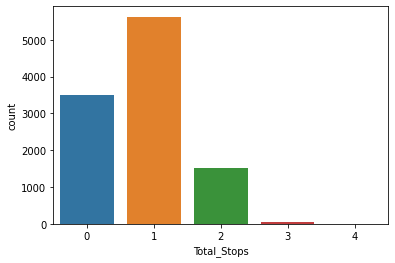

In [281]:
sb.countplot(x='Total_Stops',data=df)

In [282]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,170,0,8,3897
1,1,1/05/2019,3,0,84,05:50,13:15,445,2,8,7662
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,1140,2,8,13882
3,3,12/05/2019,3,0,91,18:05,23:30,325,1,8,6218
4,3,01/03/2019,0,5,29,16:50,21:35,285,1,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,64,19:55,22:25,150,0,8,4107
10678,1,27/04/2019,3,0,64,20:45,23:20,155,0,8,4145
10679,4,27/04/2019,0,2,18,08:20,11:20,180,0,8,7229
10680,10,01/03/2019,0,5,18,11:30,14:10,160,0,8,12648


In [283]:
df["Date_Day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Date_Month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df["Date_Year"] = df['Date_of_Journey'].str.split('/').str[2].astype(int)
df=df.drop(["Date_of_Journey"], axis = 1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Day,Date_Month,Date_Year
0,3,0,5,18,22:20,01:10 22 Mar,170,0,8,3897,24,3,2019
1,1,3,0,84,05:50,13:15,445,2,8,7662,1,5,2019
2,4,2,1,118,09:25,04:25 10 Jun,1140,2,8,13882,9,6,2019
3,3,3,0,91,18:05,23:30,325,1,8,6218,12,5,2019
4,3,0,5,29,16:50,21:35,285,1,8,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,64,19:55,22:25,150,0,8,4107,9,4,2019
10678,1,3,0,64,20:45,23:20,155,0,8,4145,27,4,2019
10679,4,0,2,18,08:20,11:20,180,0,8,7229,27,4,2019
10680,10,0,5,18,11:30,14:10,160,0,8,12648,1,3,2019


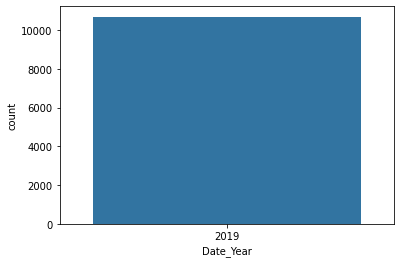

In [284]:
sb.countplot(x='Date_Year',data=df)


In [285]:
df=df.drop(["Date_Year"], axis = 1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Day,Date_Month
0,3,0,5,18,22:20,01:10 22 Mar,170,0,8,3897,24,3
1,1,3,0,84,05:50,13:15,445,2,8,7662,1,5
2,4,2,1,118,09:25,04:25 10 Jun,1140,2,8,13882,9,6
3,3,3,0,91,18:05,23:30,325,1,8,6218,12,5
4,3,0,5,29,16:50,21:35,285,1,8,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,64,19:55,22:25,150,0,8,4107,9,4
10678,1,3,0,64,20:45,23:20,155,0,8,4145,27,4
10679,4,0,2,18,08:20,11:20,180,0,8,7229,27,4
10680,10,0,5,18,11:30,14:10,160,0,8,12648,1,3


In [286]:
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df=df.drop(["Dep_Time"], axis = 1)
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df=df.drop(["Arrival_Time"], axis = 1)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_Day,Date_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,170,0,8,3897,24,3,22,20,1,10
1,1,3,0,84,445,2,8,7662,1,5,5,50,13,15
2,4,2,1,118,1140,2,8,13882,9,6,9,25,4,25
3,3,3,0,91,325,1,8,6218,12,5,18,5,23,30
4,3,0,5,29,285,1,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3,0,64,150,0,8,4107,9,4,19,55,22,25
10678,1,3,0,64,155,0,8,4145,27,4,20,45,23,20
10679,4,0,2,18,180,0,8,7229,27,4,8,20,11,20
10680,10,0,5,18,160,0,8,12648,1,3,11,30,14,10


In [287]:
from sklearn.linear_model import LogisticRegression
X=df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13]]
y=df.iloc[:,7]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2040)

# Training Models

In [288]:
from sklearn.metrics import r2_score


# Model 1) DTR

In [385]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)
r2=r2_score(y_test,model1.predict(x_test))
print(r2)

0.8242168642745658


In [386]:
#from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error as mse
l=[]
criterion=["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter=["best", "random"]
best_criteria,best_splitter,best_depth,best_sample_split,r2__max=None,None,None,None,0
for criteria in criterion:
  for splits in splitter:
    
      for sample_split in range(2,10):
        decision_model=DecisionTreeRegressor(criterion=criteria,splitter=splits,min_samples_split=sample_split)
        decision_model.fit(x_train,y_train)
        r2=r2_score(y_test,decision_model.predict(x_test))
        l.append(r2)
        if (r2>r2__max):
          r2__max=r2
          best_criteria=criteria
          best_splitter=splits
          
          best_sample_split=sample_split
print("The best splitter is:",best_splitter)

print("The best creteria is:",best_criteria)
print("The minimum sample split is:",best_sample_split)

The best splitter is: random
The best creteria is: squared_error
The minimum sample split is: 9


In [387]:
model_1=DecisionTreeRegressor(criterion=best_criteria,splitter=best_splitter,min_samples_split=best_sample_split)
model_1.fit(x_train,y_train)
r2=r2_score(y_test,model_1.predict(x_test))
mean_square_error=mse(y_test,model_1.predict(x_test))
print("r2 score:",r2)
print('mse:',mean_square_error)


r2 score: 0.8537829453180318
mse: 3078306.5778722963


# Model 2) LGBM

In [296]:
import lightgbm
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
x_train_lbl=x_train.copy()
x_test_lbl=x_test.copy()
x_train_lbl['Total_Stops'] = lbl.fit_transform(x_train_lbl['Total_Stops'].astype(int))
x_test_lbl['Total_Stops'] = lbl.fit_transform(x_test_lbl['Total_Stops'].astype(int))
model2=lightgbm.LGBMRegressor()
model2.fit(x_train_lbl,y_train)
r2_score(y_test,model2.predict(x_test_lbl))

0.8780162730015743

In [352]:
#from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error as mse
l=[]
est=[100,200,300,400,700,1000]
splitter=["best", "random"]
best_val,best_splitter,best_leaves,best_depth,r2__max=None,None,None,None,0
for vals in est:
  #for splits in splitter:
    
      for leaves in range(2,15):
        decision_model=lightgbm.LGBMRegressor(n_estimators=vals,num_leaves=leaves,)
        decision_model.fit(x_train,y_train)
        r2=r2_score(y_test,decision_model.predict(x_test))
        l.append(r2)
        if (r2>r2__max):
          r2__max=r2
          best_vals=vals
          best_leaves=leaves
          
          
print("The best n_est is:",best_vals)
print("The best n_leaves is:",best_leaves)


The best n_est is: 1000
The best n_leaves is: 12


In [355]:
model__2=lightgbm.LGBMRegressor(n_estimators=best_vals,num_leaves=best_leaves)
model__2.fit(x_train_lbl,y_train)
r2_2=r2_score(y_test,model__2.predict(x_test_lbl))
mean_square_error_2=mse(y_test,model__2.predict(x_test_lbl))
print("r2 score:",r2_2)
print('mse:',mean_square_error_2)

r2 score: 0.9099759892304289
mse: 1895274.8372696654


# Model 3) XGBR

In [357]:
import xgboost as xgb
model3=xgb.XGBRegressor()
model3.fit(x_train_lbl,y_train)
r2_score(y_test,model3.predict(x_test_lbl))

[18:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8382866310648248

In [364]:
#from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error as mse
l=[]
verb=[0,1,2,3]
splitter=["best", "random"]
best_verb,best_splitter,best_depth,r2__max=None,None,None,0
for v in verb:
  
    
      for depth in range(2,15):
        decision_model=xgb.XGBRegressor(verbosity=v,max_depth=depth)
        decision_model.fit(x_train,y_train)
        r2=r2_score(y_test,decision_model.predict(x_test))
        l.append(r2)
        if (r2>r2__max):
          r2__max=r2
          best_verb=v
          best_depth=depth
          
          
print("The best verbosity is:",best_verb)
print("The best depth:",best_depth)


[18:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [362]:
model__3=xgb.XGBRegressor(n_estimators=best_vals,num_leaves=best_leaves)
model__3.fit(x_train_lbl,y_train)
r2_3=r2_score(y_test,model__3.predict(x_test_lbl))
mean_square_error_3=mse(y_test,model__3.predict(x_test_lbl))
print("r2 score:",r2_3)
print('mse:',mean_square_error_3)

[18:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score: 0.8906511973654991
mse: 2302119.538410828


# Model 4) Extra Trees Regressor

In [302]:
from sklearn.ensemble import ExtraTreesRegressor
model4=ExtraTreesRegressor()
model4.fit(x_train,y_train)
r2_score(y_test,model4.predict(x_test))

0.9146474855944253

In [ ]:
l=[]
criterion=["squared_error","absolute_error"]
splitter=["best", "random"]
est=[100,200,300,400,700,1000]
best_criteria,best_splitter,best_est,best_sample_split,r2__max=None,None,None,None,0
for criteria in criterion:
  
    for vals in est:
      for sample_split in range(2,10):
        decision_model=ExtraTreesRegressor(criterion=criteria,n_estimators=vals,min_samples_split=sample_split)
        decision_model.fit(x_train,y_train)
        r2=r2_score(y_test,decision_model.predict(x_test))
        l.append(r2)
        if (r2>r2__max):
          r2__max=r2
          best_criteria=criteria
          best_est=vals
          
          best_sample_split=sample_split


In [374]:
model_4=ExtraTreesRegressor(criterion=best_criteria,n_estimators=vals,min_samples_split=best_sample_split)
model_4.fit(x_train,y_train)
r2_4=r2_score(y_test,model_4.predict(x_test))
mean_square_error_4=mse(y_test,model_4.predict(x_test))
print("r2 score:",r2_4)
print('mse:',mean_square_error_4)


r2 score: 0.93916513924632
mse: 1810790.5964142554


# Model 5) Random Forest Regressor

In [301]:
from sklearn.ensemble import RandomForestRegressor
model5=RandomForestRegressor()
model5.fit(x_train,y_train)
r2_score(y_test,model5.predict(x_test))

0.8950404393890142

In [ ]:
l=[]
criterion=["squared_error","absolute_error"]
splitter=["best", "random"]
est=[100,400,700,1000]
best_criteria,best_splitter,best_est,best_sample_split,r2__max=None,None,None,None,0
for criteria in criterion:
  
    for vals in est:
      for sample_split in range(2,7):
        decision_model=RandomForestRegressor(criterion=criteria,n_estimators=vals,min_samples_split=sample_split)
        decision_model.fit(x_train,y_train)
        r2=r2_score(y_test,decision_model.predict(x_test))
        l.append(r2)
        if (r2>r2__max):
          r2__max=r2
          best_criteria=criteria
          best_est=vals
          
          best_sample_split=sample_split
print("The best criterion is:",best_criteria)

print("The best n_estimators is:",best_est)
print("The minimum sample split is:",best_sample_split)

In [370]:
model_5=RandomForestRegressor(criterion=best_criteria,n_estimators=best_est,min_samples_split=best_sample_split)
model_5.fit(x_train,y_train)
r2_5=r2_score(y_test,model_5.predict(x_test))
mean_square_error_5=mse(y_test,model_5.predict(x_test))
print("r2 score:",r2_5)
print('mse:',mean_square_error_5)


r2 score: 0.9370125439805143
mse: 2201871.1185791176


# Performance Evaluation and Analysis

In [388]:
d={'Model':['Decision Tree Regressor','LGBM Regressor','XGBoost Regressor','Extra Trees Regressor','Random Forest Regressor'],'r2_score':[r2,r2_2,r2_3,r2_4,r2_5],'mse':[mean_square_error,mean_square_error_2,mean_square_error_3,mean_square_error_4,mean_square_error_5]}

In [389]:
table=pd.DataFrame(d)
table.headers=['Model','r2-score','mse']
table

,Model,r2_score,mse
0,Decision Tree Regressor,0.853783,3.078307e+06
1,LGBM Regressor,0.909976,1.895275e+06
2,XGBoost Regressor,0.890651,2.302120e+06
3,Extra Trees Regressor,0.939165,1.810791e+06
4,Random Forest Regressor,0.937013,2.201871e+06
